<a href="https://colab.research.google.com/github/Hemn-Khdr/intro-ml-course-winter2025/blob/Datathon%234/Datathon4_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing data


In [ ]:
# !pip install torch

# importing torch as t
import torch as t
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

EDITED 2025-03-09

In [ ]:
#Use this if you are running the code on Colab
from google.colab import files
import io

uploaded = files.upload()



Saving Datathon4.csv to Datathon4.csv


In [ ]:
# Read the dataset into a Pandas DataFrame
data = pd.read_csv(io.BytesIO(uploaded['Datathon4.csv']))

# Display the first few rows of the dataset to ensure it's loaded correctly
data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


## Data exploration

In [ ]:
data.columns

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')

In [ ]:
# prompt: Create code for this dataset that will see the  type of varaible such as integer, float, string

import pandas as pd

# Assuming 'data' DataFrame is already loaded as shown in the previous code

for col in data.columns:
  print(f"Column '{col}' data type: {data[col].dtype}")


Column 'alx' data type: float64
Column 'aly' data type: float64
Column 'alz' data type: float64
Column 'glx' data type: float64
Column 'gly' data type: float64
Column 'glz' data type: float64
Column 'arx' data type: float64
Column 'ary' data type: float64
Column 'arz' data type: float64
Column 'grx' data type: float64
Column 'gry' data type: float64
Column 'grz' data type: float64
Column 'Activity' data type: int64
Column 'subject' data type: object


In [ ]:
print(data.shape)

(999999, 14)


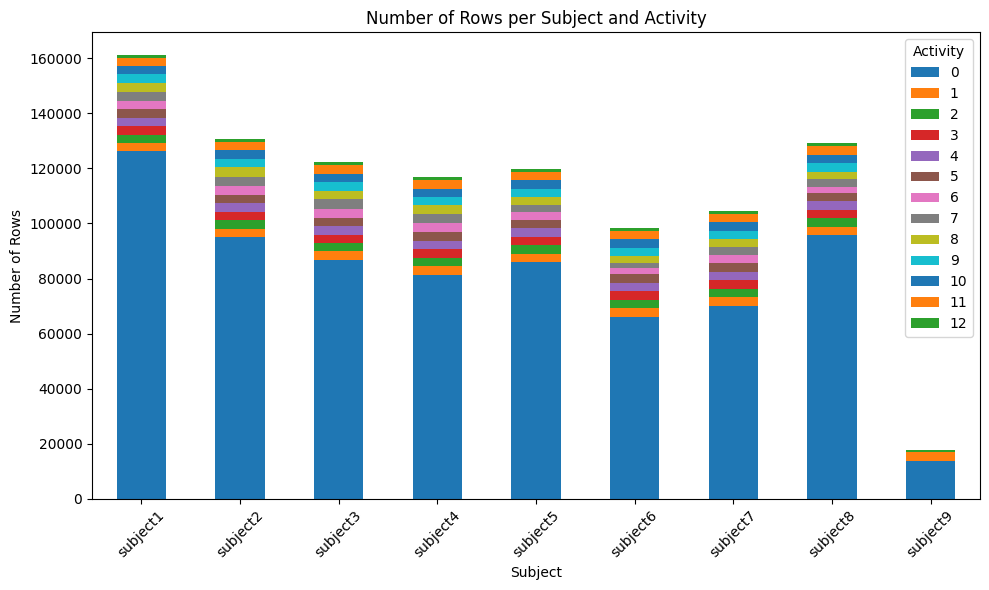

In [ ]:
# Create a plot that shown the nubmer of rows of data, stratified by the subject and activity

import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded as shown in the previous code

# Group data by 'subject' and 'activity' and count the number of rows
activity_counts = data.groupby(['subject', 'Activity']).size().unstack(fill_value=0)

# Plot the counts
activity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Rows per Subject and Activity')
plt.xlabel('Subject')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.legend(title='Activity')
plt.tight_layout()
plt.show()


In [ ]:
#Seeing count of rows

numerical_vars = data.select_dtypes(include=["number"]).columns.tolist()
categorical_vars = data.select_dtypes(exclude=["number"]).columns.tolist()
dataset_overview = {
    "Total Rows": data.shape[0],
    "Total Columns": data.shape[1],
    "Duplicate Rows": data.duplicated().sum(),
    "Numerical Column Counts": len(numerical_vars),
    "Categorical Column counts": len(categorical_vars)
}
dataset_overview

{'Total Rows': 999999,
 'Total Columns': 14,
 'Duplicate Rows': 0,
 'Numerical Column Counts': 13,
 'Categorical Column counts': 1}

In [ ]:
numerical_vars

['alx',
 'aly',
 'alz',
 'glx',
 'gly',
 'glz',
 'arx',
 'ary',
 'arz',
 'grx',
 'gry',
 'grz',
 'Activity']

In [ ]:
categorical_vars

['subject']

In [ ]:
negative_values = data[numerical_vars] <0
negative_perc = negative_values.sum()/len(data) * 100
display(negative_perc)

#LOT OF NEGATIVE VALUES WHICH IS OK


,0
alx,23.179623
aly,95.883996
alz,50.231950
glx,52.990253
gly,95.026495
glz,57.008157
arx,83.680284
ary,82.670283
arz,20.582221
grx,72.933673


In [ ]:
# prompt: Generate code to calculate how many missing values are in each column

# Calculate the number of missing values in each column
missing_values = data.isnull().sum()

# Print the results
missing_values

# NO MISSING VALUES



,0
alx,0
aly,0
alz,0
glx,0
gly,0
glz,0
arx,0
ary,0
arz,0
grx,0


<Axes: >

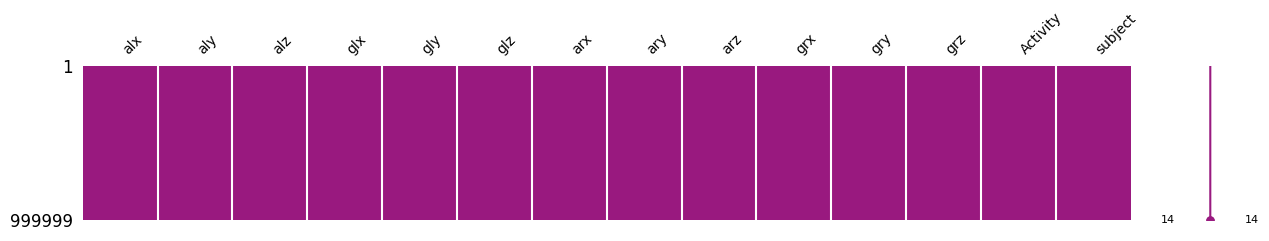

In [ ]:
# !pip install missingno
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(data, figsize=(15,2), fontsize=10, color=(.6,.1,0.5))

#FURTHER SHOWING NO MISSING

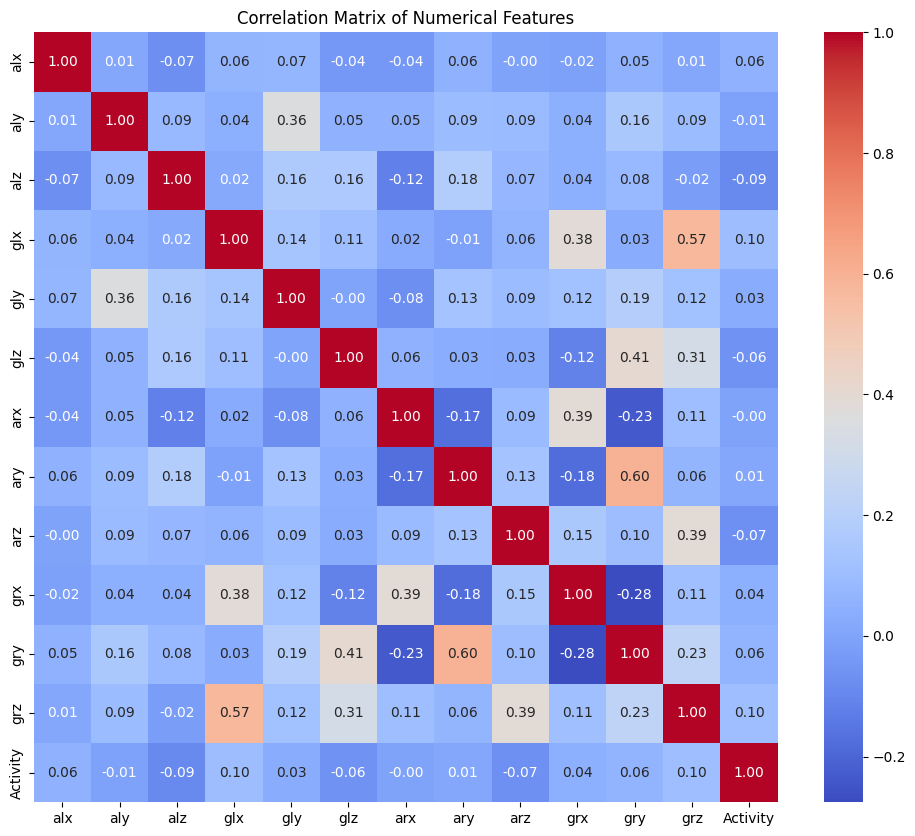

In [ ]:
# prompt: Create correlation matrix

# Assuming 'data' DataFrame is already loaded as shown in the previous code
# and numerical_vars is defined as in the original code.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical features for correlation analysis
# If 'Activity' is a numerical feature you want to include:
# numerical_data = data[[c for c in numerical_vars if c in data.columns] + ['Activity'] if 'Activity' in data.columns else []]
# Select only numerical features for correlation analysis
numerical_data = data[[c for c in numerical_vars if c in data.columns]]

# Include 'activity_category' if it's in the DataFrame and numerical
if 'activity_category' in data.columns and data['activity_category'].dtype in [np.int64, np.float64]:
    numerical_data = numerical_data[['activity_category']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Creating ID column


In [ ]:
def Create_ID_column_for_participant_and_activity(df, participant_ID:str, activity:str, count_col='activity_participant_ID'):
    """
    This function assigns a unique identifier to each participant-activity sequence in the dataframe.
    Every time a participant switches activities, a new ID is assigned in the specified column.

    This assumes that the data is in chronological order and accounts for cases where a participant
    engages in multiple activities over time (e.g., switching from activity 0 to activity 1, back to 0,
    and then to activity 2). Each transition triggers a new ID to be created, aiding in grouping and
    sequence generation.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        participant_ID (str): Column name representing the participant identifier.
        activity (str): Column name representing the activity label.
        count_col (str, optional): Name of the new column to store sequence IDs. Default is 'activity_participant_ID'.

    Returns:
        pd.DataFrame: The dataframe with an added column assigning unique sequence IDs.
    """
    df[count_col] = 0  # initialize the new ID column with 0

    # initialize variables to store last values
    last_subject = None
    last_activity = None
    count = 0

    # loop through the rows of the df
    for index, row in df.iterrows():
        current_subject = row[participant_ID]
        current_activity = row[activity]

        # check if the values are the same as the last row
        if current_subject == last_subject and current_activity == last_activity:
            df.at[index, count_col] = count
        else:
            count += 1
            df.at[index, count_col] = count

        # update the last values
        last_subject = current_subject
        last_activity = current_activity

    return df

# Call the function to modify 'data'
data = Create_ID_column_for_participant_and_activity(df=data, participant_ID='subject', activity='Activity')

# Print the modified DataFrame to verify
data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject,activity_participant_ID
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1,1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1,1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1,1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1,1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1,1


In [ ]:
# prompt: print data

data

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject,activity_participant_ID
0,2.18490,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.01030,0.034483,0,subject1,1
1,2.38760,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.01030,0.034483,0,subject1,1
2,2.40860,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.01030,0.034483,0,subject1,1
3,2.18140,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.00820,0.025862,0,subject1,1
4,2.41730,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.00820,0.025862,0,subject1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,0.75593,-8.9661,4.38220,-0.465680,-0.54597,0.61690,-6.6138,-2.5801,6.985600,-0.69804,0.48049,0.616380,2,subject9,216
999995,0.76348,-8.8288,4.25370,-0.465680,-0.54597,0.61690,-6.4246,-2.5633,6.673900,-0.69804,0.48049,0.616380,2,subject9,216
999996,0.76376,-8.9685,4.14250,-0.484230,-0.54221,0.63065,-6.8242,-2.5435,6.654100,-0.71373,0.46817,0.601290,2,subject9,216
999997,0.80362,-8.8894,4.12610,-0.484230,-0.54221,0.63065,-6.6379,-2.5223,6.769700,-0.71373,0.46817,0.601290,2,subject9,216


## Combining activities to create 0, 1, 2

In [ ]:
# prompt: combine Activity column to activity_category. 0 will be 0, 1-3 will be 1 and 4-12 will be 2

# Define a function to map activity values to activity categories
def categorize_activity(activity):
    if activity == 0:
        return 0
    elif 1 <= activity <= 3:
        return 1
    elif 4 <= activity <= 12:
        return 2
    else:
        return activity  # Keep the original value for activities outside the specified ranges

# Apply the function to the 'Activity' column to create the 'activity_category' column
data['activity_category'] = data['Activity'].apply(categorize_activity)

# Display the first few rows to verify the changes
print(data[['Activity', 'activity_category']].head(20))


    Activity  activity_category
0          0                  0
1          0                  0
2          0                  0
3          0                  0
4          0                  0
5          0                  0
6          0                  0
7          0                  0
8          0                  0
9          0                  0
10         0                  0
11         0                  0
12         0                  0
13         0                  0
14         0                  0
15         0                  0
16         0                  0
17         0                  0
18         0                  0
19         0                  0


In [ ]:
# prompt: print descriptive stats for activity_category and count for each group

# Assuming 'data' DataFrame is already loaded and 'activity_category' column exists

# Group by 'activity_category' and get descriptive statistics for relevant columns
# descriptive_stats = data2.groupby('activity_category').describe() # original line causing the error
# Changed to describe the 'activity_category' column within the groups:
descriptive_stats = data.groupby('activity_category')['activity_category'].describe()


# Print the descriptive statistics
print(descriptive_stats)

# Calculate the count for each activity category
activity_counts = data['activity_category'].value_counts()

# Print the activity counts
print("\nActivity Category Counts:")
print(activity_counts)

                      count  mean  std  min  25%  50%  75%  max
activity_category                                              
0                  720946.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1                   77630.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
2                  201423.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0

Activity Category Counts:
activity_category
0    720946
2    201423
1     77630
Name: count, dtype: int64


In [ ]:
# prompt: remove activity_group column

# Assuming 'data' DataFrame is already loaded as shown in the previous code

# Drop the 'activity_group' column if it exists
if 'Activity' in data.columns:
    data = data.drop('Activity', axis=1)

# Verify that the column has been removed (optional)
data.columns


Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'subject', 'activity_participant_ID',
       'activity_category'],
      dtype='object')

## Drop subject 9

In [ ]:
# prompt: code to drop subject9 rows from the subject column. Not being removed

# Assuming 'data' DataFrame is already loaded as shown in the previous code

# Drop rows where 'subject' is equal to 9
# data = data[data['subject'] != subject9] # original line causing the error
# Changed to use string literal "subject9" instead of undefined variable subject9:
data = data[data['subject'] != "subject9"]

# Verify that subject 9 has been removed (optional)
print(data['subject'].unique())


['subject1' 'subject2' 'subject3' 'subject4' 'subject5' 'subject6'
 'subject7' 'subject8']


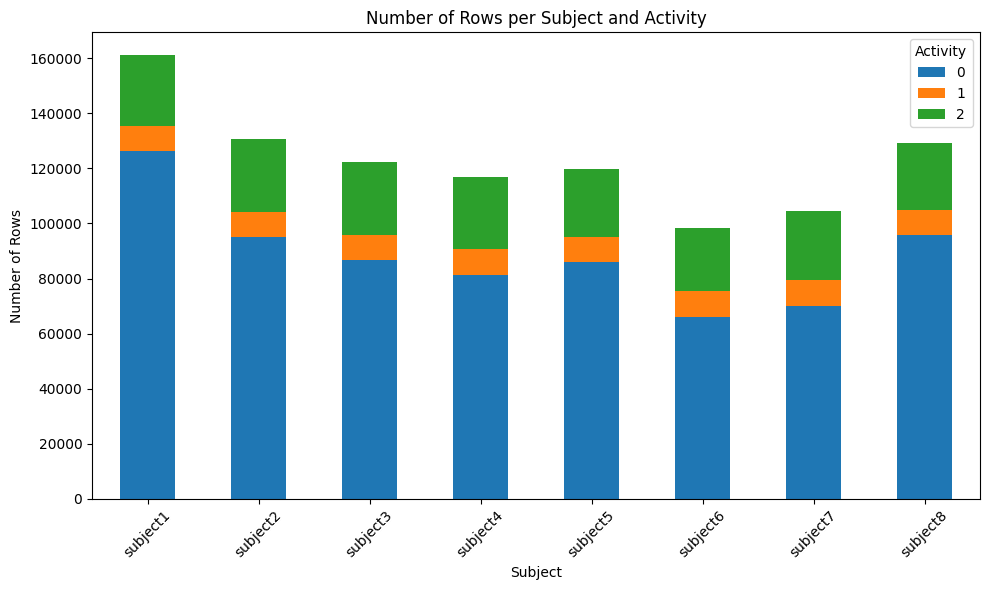

In [ ]:
# Group data by 'subject' and 'activity' and count the number of rows
activity_counts = data.groupby(['subject', 'activity_category']).size().unstack(fill_value=0)

# Plot the counts
activity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Rows per Subject and Activity')
plt.xlabel('Subject')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.legend(title='Activity')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: print descriptive stats for activity_category and count for each group

# Assuming 'data' DataFrame is already loaded and 'activity_category' column exists

# Group by 'activity_category' and get descriptive statistics for relevant columns
# descriptive_stats = data2.groupby('activity_category').describe() # original line causing the error
# Changed to describe the 'activity_category' column within the groups:
descriptive_stats = data.groupby('activity_category')['activity_category'].describe()


# Print the descriptive statistics
print(descriptive_stats)

# Calculate the count for each activity category
activity_counts = data['activity_category'].value_counts()

# Print the activity counts
print("\nActivity Category Counts:")
print(activity_counts)

                      count  mean  std  min  25%  50%  75%  max
activity_category                                              
0                  707122.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1                   73728.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
2                  201423.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0

Activity Category Counts:
activity_category
0    707122
2    201423
1     73728
Name: count, dtype: int64


## Label encoding subject column


In [ ]:
# prompt: create label encoding for subject column to create 1-8 and create a new dataset with all columns called data2

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'subject' column
data['subject'] = label_encoder.fit_transform(data['subject'])

# Create a copy of the DataFrame with all columns
data2 = data.copy()


In [ ]:
# prompt: drop subject column from data2

# Assuming 'data2' DataFrame is already loaded and 'subject' column exists

# Drop the 'subject' column
data2 = data2.drop('subject', axis=1)

# Verify that the column has been removed (optional)
data2.columns


Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'activity_participant_ID', 'activity_category'],
      dtype='object')

In [ ]:
# prompt: create the subject_encoded to be listed 1-8 not 0-7

# Assuming 'data' DataFrame is already loaded and 'subject' column exists

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'subject' column
data2['subject_encoded'] = label_encoder.fit_transform(data['subject']) + 1

# Display the unique values of the encoded column
print(data2['subject_encoded'].unique())


[1 2 3 4 5 6 7 8]


In [ ]:
# prompt: print data2

data2


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,activity_participant_ID,activity_category,subject_encoded
0,2.1849,-9.6967,0.630770,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.01030,0.034483,1,0,1
1,2.3876,-9.5080,0.683890,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.01030,0.034483,1,0,1
2,2.4086,-9.5674,0.681130,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.01030,0.034483,1,0,1
3,2.1814,-9.4301,0.550310,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.00820,0.025862,1,0,1
4,2.4173,-9.3889,0.710980,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.00820,0.025862,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982268,2.4278,-9.5092,-1.419900,-0.087199,-0.61351,-0.91356,-6.5514,5.1998,-2.021300,-0.68431,-0.10678,-0.732760,212,0,8
982269,2.8406,-9.4646,-0.913570,-0.087199,-0.61351,-0.91356,-6.6629,5.5525,-2.753600,-0.68431,-0.10678,-0.732760,212,0,8
982270,3.4740,-10.7230,-0.053508,-0.087199,-0.61351,-0.91356,-7.3405,6.0766,-2.342000,-0.68431,-0.10678,-0.732760,212,0,8
982271,2.1789,-11.5930,-0.849510,-0.087199,-0.61351,-0.91356,-8.1415,6.5154,-2.455500,-0.66667,-0.11499,-0.758620,212,0,8


##Create Data3 for undersampling below

In [ ]:
# prompt: Create code replicating data2 to data3

# Assuming 'data2' DataFrame is already loaded and processed as shown in the previous code.

# Create a copy of data2 named data3
data3 = data2.copy()

## Splitting to train/test

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


# Grouping by 'subject_encoded' and creating a list of dataframes, one per group
grouped = data2.groupby('subject_encoded')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 70:30 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.3, random_state=42)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Assuming 'activity_category' is the target variable and 0 is the majority class
target_column = 'activity_category'

# Separate features and target variable for train and test sets
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]



# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape




((592128, 15), (390145, 15))

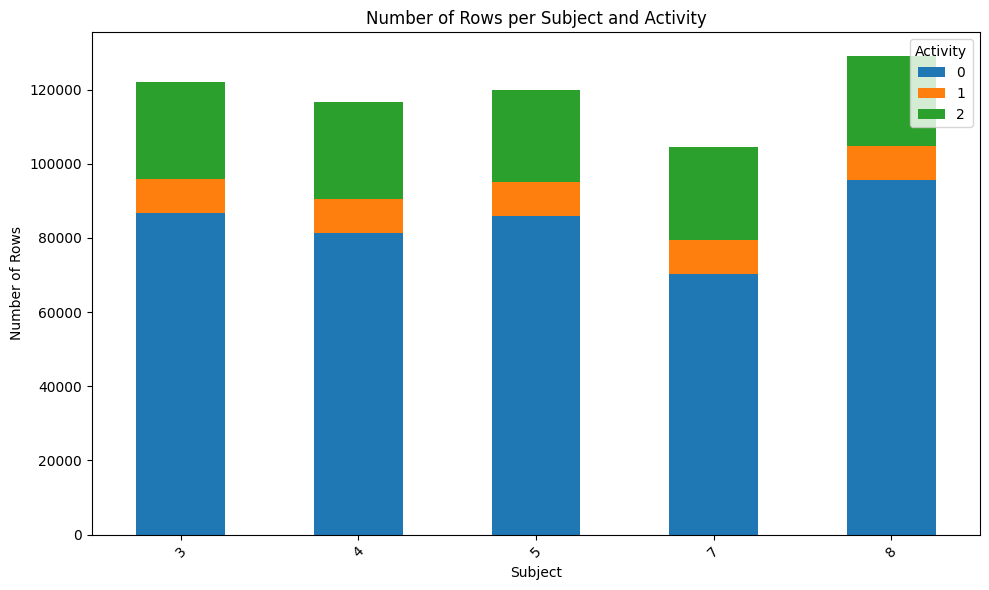

In [ ]:
# Group data by 'subject' and 'activity' and count the number of rows
activity_counts = train_df.groupby(['subject_encoded', 'activity_category']).size().unstack(fill_value=0)

# Plot the counts
activity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Rows per Subject and Activity')
plt.xlabel('Subject')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.legend(title='Activity')
plt.tight_layout()
plt.show()


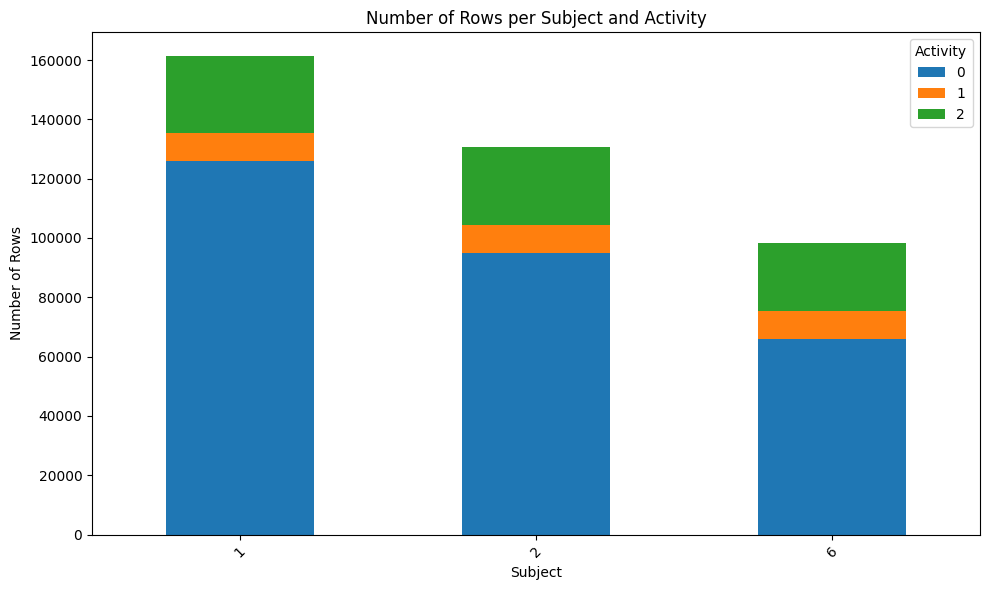

In [ ]:
# Group data by 'subject' and 'activity' and count the number of rows
activity_counts = test_df.groupby(['subject_encoded', 'activity_category']).size().unstack(fill_value=0)

# Plot the counts
activity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Rows per Subject and Activity')
plt.xlabel('Subject')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.legend(title='Activity')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: generate code to remove subject_encoded from test and train

# Assuming 'train_df' and 'test_df' are already defined as in the previous code

# Remove 'subject_encoded' from train_df
train_df = train_df.drop('subject_encoded', axis=1)

# Remove 'subject_encoded' from test_df
test_df = test_df.drop('subject_encoded', axis=1)

# Verify the changes (optional)
print(train_df.columns)
test_df.columns


Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'activity_participant_ID', 'activity_category'],
      dtype='object')


Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'activity_participant_ID', 'activity_category'],
      dtype='object')

## Test data -  Noramlizing

In [ ]:
# Identifying numerical columns (excluding 'subject_encoded' and 'activity_category')
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('activity_category')
numerical_columns.remove('activity_participant_ID')

  # Creating a StandardScaler instance
scaler = StandardScaler()

  # Fitting the scaler on the training data and transforming both training and testing data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,activity_participant_ID,activity_category
853249,-0.547163,-0.062730,-0.127699,-0.234072,1.210592,1.575257,0.176803,-0.607786,-0.804893,-0.843860,0.388106,-1.282603,186,0
853250,-0.504805,-0.046055,-0.134498,-0.234072,1.210592,1.575257,0.219691,-0.646428,-0.812761,-0.836729,0.403929,-1.313526,186,0
853251,-0.431142,-0.031797,-0.141186,-0.263303,1.205269,1.599763,0.180627,-0.620538,-0.790077,-0.836729,0.403929,-1.313526,186,0
853252,-0.507121,-0.062512,-0.111990,-0.263303,1.205269,1.599763,0.215182,-0.648119,-0.791960,-0.836729,0.403929,-1.313526,186,0
853253,-0.510317,-0.041077,-0.118918,-0.263303,1.205269,1.599763,0.186665,-0.620538,-0.790077,-0.836729,0.403929,-1.313526,186,0


## Sequence generation

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Group by 'activity_participant_ID' and create sequences
grouped = train_df.groupby('activity_participant_ID', sort=False)

# Get the last activity category for each subject as the target
targets = [group['activity_category'].iloc[-1] for _, group in grouped]

# Create sequences without padding initially
sequences = [group.drop(columns=['activity_participant_ID', 'activity_category']).values for _, group in grouped]

# Find the maximum sequence length
max_length = max(len(s) for s in sequences)

# Pad sequences to the maximum length (adjust max_length if needed)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', dtype='float')

padded_sequences.shape

(137, 38912, 12)

In [ ]:
#Testing sequences

# Group by 'subject_encoded' and create sequences
grouped_test = test_df.groupby('activity_participant_ID', sort=False)
sequences_test = [group.drop(columns=['activity_participant_ID', 'activity_category']).values for _, group in grouped_test]
targets_test = [group['activity_category'].iloc[-1] for _, group in grouped_test]  # Assuming all records for a patient have the same target

# Padding sequences for the test set using max_length from training set
padded_sequences_test = pad_sequences(sequences_test, maxlen=max_length, padding='post', dtype='float') # Using max_length from training data

padded_sequences_test.shape

(75, 38912, 12)

## RNN

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Hyperparameters
input_size = padded_sequences.shape[2]
hidden_size = 32
num_classes = 3  # For three-class classification
epochs = 32
learning_rate = 0.001
batch_size =  128
landa = 0.001  # Regularization strength, experiment


# Data preparation
train_dataset = TensorDataset(t.tensor(padded_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True, nonlinearity='tanh')
dropout1 = nn.Dropout(0.5)
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)
fc_layer2 = nn.Linear(hidden_size // 2, num_classes)

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers


# Activation functions
tanh_activation = nn.Tanh()



# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()


# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []


# Training loop
for epoch in range(epochs):
    # Learning rate scheduling (adjust as needed)
    if epoch % 10 == 0:
        learning_rate *= 0.9

    optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()),
                     lr=learning_rate, weight_decay=landa)  # Added weight decay for L2 regularization

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass
        out, _ = rnn_layer1(X)
        out = out[:, -1, :]  # Get the last output of the RNN sequence
        out = tanh_activation(fc_layer1(out))  # Applying Tanh
        out = dropout_fc(out)  # Applying dropout
        out = fc_layer2(out)

        # Calculate loss
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data evaluation (adjust as needed)
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]  # Get the last output
            out = tanh_activation(fc_layer1(out))
            out = dropout_fc(out)  # Applying dropout during evaluation as well
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data evaluation
        validation_correct, validation_total = 0, 0
        all_targets = []
        all_predictions = []

        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]  # Get the last output
            out = tanh_activation(fc_layer1(out))
            out = dropout_fc(out)  # Applying dropout during evaluation as well
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)

            all_targets.extend(Y.tolist())
            all_predictions.extend(predicted.tolist())

            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()

        validation_accuracy = 100 * validation_correct / validation_total

        # Calculate and print metrics (for validation set)
        val_f1 = f1_score(all_targets, all_predictions, average='macro', zero_division=1)  # or zero_division=0
        val_precision = precision_score(all_targets, all_predictions, average='macro', zero_division=1)  # or zero_division=0
        val_recall = recall_score(all_targets, all_predictions, average='macro', zero_division=1)  # or zero_division=0
        val_acc = accuracy_score(all_targets, all_predictions)

        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')
        print(f'Epoch {epoch}/{epochs} ---> Validation F1: {val_f1:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, Accuracy: {val_acc:.4f}')

        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    rnn_layer1.train()
    fc_layer1.train()
    fc_layer2.train()






Epoch 0/32 ---> Train Accuracy: 34.306569343065696%, Validation Accuracy: 36.0%
Epoch 0/32 ---> Validation F1: 0.1800, Precision: 0.4566, Recall: 0.3333, Accuracy: 0.3600
Epoch 1/32 ---> Train Accuracy: 35.76642335766423%, Validation Accuracy: 34.666666666666664%
Epoch 1/32 ---> Validation F1: 0.1733, Precision: 0.4521, Recall: 0.3210, Accuracy: 0.3467
Epoch 2/32 ---> Train Accuracy: 35.03649635036496%, Validation Accuracy: 36.0%
Epoch 2/32 ---> Validation F1: 0.1765, Precision: 0.7867, Recall: 0.3333, Accuracy: 0.3600
Epoch 3/32 ---> Train Accuracy: 36.496350364963504%, Validation Accuracy: 34.666666666666664%
Epoch 3/32 ---> Validation F1: 0.1733, Precision: 0.1187, Recall: 0.3210, Accuracy: 0.3467
Epoch 4/32 ---> Train Accuracy: 37.22627737226277%, Validation Accuracy: 36.0%
Epoch 4/32 ---> Validation F1: 0.2342, Precision: 0.6001, Recall: 0.3105, Accuracy: 0.3600
Epoch 5/32 ---> Train Accuracy: 42.33576642335766%, Validation Accuracy: 40.0%
Epoch 5/32 ---> Validation F1: 0.2791, Pr

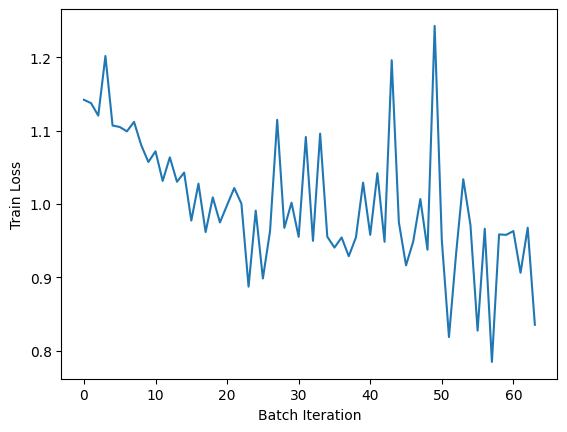

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

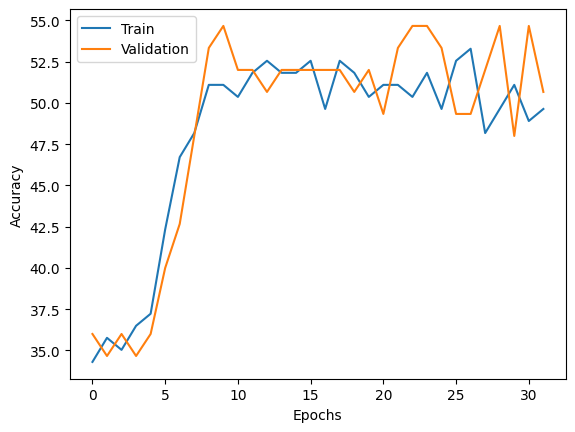

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Testing data set RNN

In [ ]:


# Assuming the necessary libraries and variables (like rnn_layer1, fc_layer1, fc_layer2, etc.) are defined as in the provided code.

# Testing loop (using the trained model)
rnn_layer1.eval()
fc_layer1.eval()
fc_layer2.eval()

all_targets = []
all_predictions = []

with t.no_grad():
    for X, Y in test_data_loader:
        out, _ = rnn_layer1(X)
        out = out[:, -1, :]  # Get the last output
        out = tanh_activation(fc_layer1(out))
        out = dropout_fc(out)  # Apply dropout during testing as well
        out = fc_layer2(out)
        _, predicted = t.max(out.data, 1)

        all_targets.extend(Y.tolist())
        all_predictions.extend(predicted.tolist())

# Calculate and print metrics (for the entire test set)
test_f1 = f1_score(all_targets, all_predictions, average='macro', zero_division=1)
test_precision = precision_score(all_targets, all_predictions, average='macro', zero_division=1)
test_recall = recall_score(all_targets, all_predictions, average='macro', zero_division=1)
test_acc = accuracy_score(all_targets, all_predictions)

print(f'Test F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, Accuracy: {test_acc:.4f}')


Test F1: 0.2539, Precision: 0.8423, Recall: 0.3457, Accuracy: 0.5333


# DOING THE SAME AS ABOVE BUT WITH UNDERSAMPLING

## Splitting to train/test and undersampling

In [ ]:
# prompt: print data2

data3

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,activity_participant_ID,activity_category,subject_encoded
0,2.1849,-9.6967,0.630770,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.01030,0.034483,1,0,1
1,2.3876,-9.5080,0.683890,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.01030,0.034483,1,0,1
2,2.4086,-9.5674,0.681130,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.01030,0.034483,1,0,1
3,2.1814,-9.4301,0.550310,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.00820,0.025862,1,0,1
4,2.4173,-9.3889,0.710980,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.00820,0.025862,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982268,2.4278,-9.5092,-1.419900,-0.087199,-0.61351,-0.91356,-6.5514,5.1998,-2.021300,-0.68431,-0.10678,-0.732760,212,0,8
982269,2.8406,-9.4646,-0.913570,-0.087199,-0.61351,-0.91356,-6.6629,5.5525,-2.753600,-0.68431,-0.10678,-0.732760,212,0,8
982270,3.4740,-10.7230,-0.053508,-0.087199,-0.61351,-0.91356,-7.3405,6.0766,-2.342000,-0.68431,-0.10678,-0.732760,212,0,8
982271,2.1789,-11.5930,-0.849510,-0.087199,-0.61351,-0.91356,-8.1415,6.5154,-2.455500,-0.66667,-0.11499,-0.758620,212,0,8


In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


# Grouping by 'subject_encoded' and creating a list of dataframes, one per group
grouped2 = data3.groupby('subject_encoded')
grouped_dfs2 = [group for _, group in grouped2]

# Splitting the groups into training and test sets with an 70:30 ratio
train_groups2, test_groups2 = train_test_split(grouped_dfs2, test_size=0.3, random_state=42)

# Reassembling the training and test datasets from the groups
train_df_resampled = pd.concat(train_groups2)
test_df_resampled = pd.concat(test_groups2)

# Assuming 'activity_category' is the target variable and 0 is the majority class
target_column2 = 'activity_category'

# Separate features and target variable for train and test sets
X_train_resampled = train_df_resampled.drop(columns=[target_column2])
y_train_resampled = train_df_resampled[target_column2]
X_test_resampled = test_df_resampled.drop(columns=[target_column2])
y_test_resampled = test_df_resampled[target_column2]

# Instantiate RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)  # For reproducibility

# Resample the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Resample the testing data
X_test_resampled, y_test_resampled = undersampler.fit_resample(X_test_resampled, y_test_resampled)

# Combine features and target back into DataFrames
train_df_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train_resampled.columns),
                                pd.DataFrame(y_train_resampled, columns=[target_column2])], axis=1)
test_df_resampled = pd.concat([pd.DataFrame(X_test_resampled, columns=X_test_resampled.columns),
                               pd.DataFrame(y_test_resampled, columns=[target_column2])], axis=1)

# Check class distribution after undersampling (optional)
print("Train set class distribution after undersampling:", Counter(y_train_resampled))
print("Test set class distribution after undersampling:", Counter(y_test_resampled))

# Displaying the shape of the training and test sets
train_df_shape_resampled = train_df_resampled.shape
test_df_shape_resampled = test_df_resampled.shape

train_df_shape_resampled, test_df_shape_resampled




Train set class distribution after undersampling: Counter({0: 46080, 1: 46080, 2: 46080})
Test set class distribution after undersampling: Counter({0: 27648, 1: 27648, 2: 27648})


((138240, 15), (82944, 15))

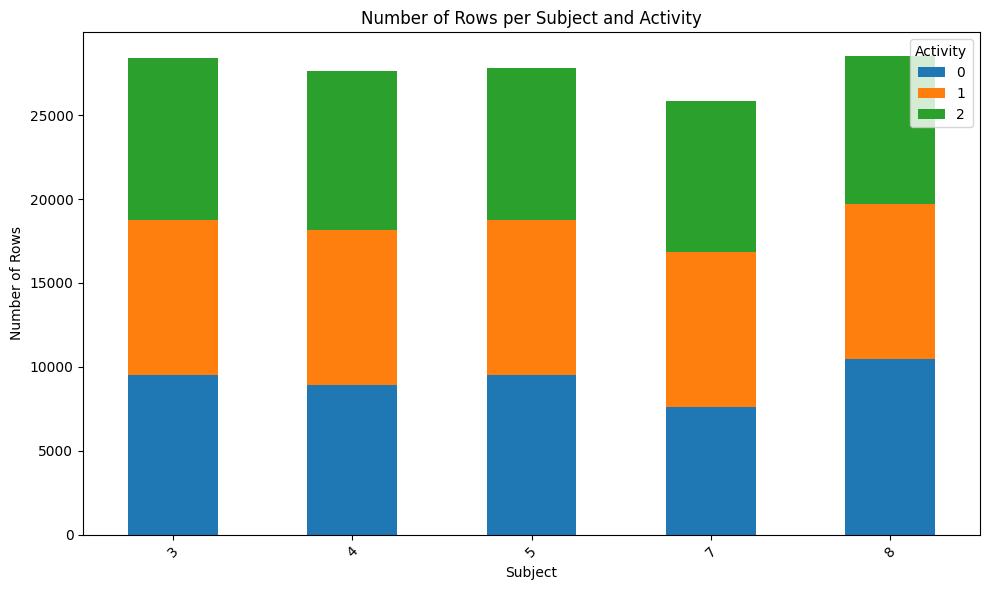

In [ ]:
# Group data by 'subject' and 'activity' and count the number of rows
activity_counts = train_df_resampled.groupby(['subject_encoded', 'activity_category']).size().unstack(fill_value=0)

# Plot the counts
activity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Rows per Subject and Activity')
plt.xlabel('Subject')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.legend(title='Activity')
plt.tight_layout()
plt.show()


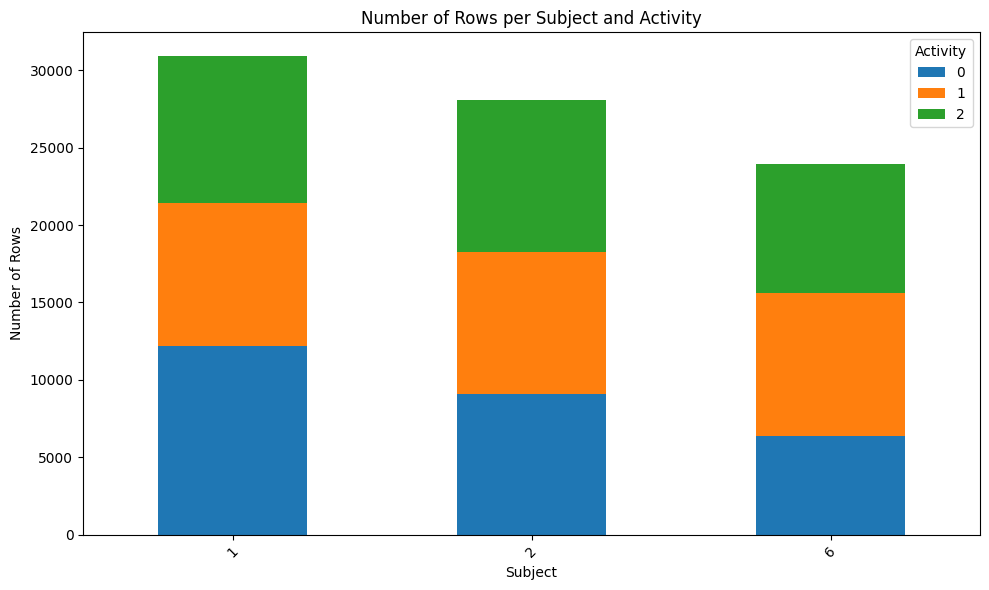

In [ ]:
# Group data by 'subject' and 'activity' and count the number of rows
activity_counts = test_df_resampled.groupby(['subject_encoded', 'activity_category']).size().unstack(fill_value=0)

# Plot the counts
activity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Rows per Subject and Activity')
plt.xlabel('Subject')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.legend(title='Activity')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: generate code to remove subject_encoded from test and train

# Assuming 'train_df' and 'test_df' are already defined as in the previous code

# Remove 'subject_encoded' from train_df
train_df_resampled = train_df_resampled.drop('subject_encoded', axis=1)

# Remove 'subject_encoded' from test_df
test_df_resampled = test_df_resampled.drop('subject_encoded', axis=1)

# Verify the changes (optional)
print(train_df_resampled.columns)
test_df_resampled.columns

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'activity_participant_ID', 'activity_category'],
      dtype='object')


Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'activity_participant_ID', 'activity_category'],
      dtype='object')

## Test data -  Noramlizing

In [ ]:
# Identifying numerical columns (excluding 'subject_encoded' and 'activity_category')
numerical_columns_resampled = train_df_resampled.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns_resampled.remove('activity_category')
numerical_columns_resampled.remove('activity_participant_ID')

  # Creating a StandardScaler instance
scaler = StandardScaler()

  # Fitting the scaler on the training data and transforming both training and testing data
train_df_resampled[numerical_columns_resampled] = scaler.fit_transform(train_df_resampled[numerical_columns_resampled])
test_df_resampled[numerical_columns_resampled] = scaler.transform(test_df_resampled[numerical_columns_resampled])

# Checking the first few rows of the normalized training data
train_df_resampled.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,activity_participant_ID,activity_category
386650,-0.446200,-0.826006,-0.046850,0.448695,-0.549244,0.919531,0.205626,-0.419194,1.486683,1.718704,0.124232,0.865923,73,0
520149,-0.315992,-0.250619,0.297968,-1.089594,-0.483767,-0.395509,-0.973112,0.192156,0.058580,-0.879417,-1.272530,-0.362006,96,0
423331,0.209926,1.128725,-1.608526,-1.908299,0.760264,-2.707309,-0.756144,0.663577,0.988399,-2.843186,1.202594,2.131488,78,0
519168,-0.149150,-0.319160,0.019161,-0.865629,-0.622901,-1.035731,0.689118,-0.138260,0.268798,-0.703960,-0.946430,-1.076222,96,0
437915,-1.082654,1.365459,0.069888,-1.056548,0.420597,-1.374884,1.280761,0.007141,0.271669,-0.207963,-1.065403,0.398139,78,0


## Sequence generation

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Group by 'activity_participant_ID' and create sequences
grouped_resampled = train_df_resampled.groupby('activity_participant_ID', sort=False)

# Get the last activity category for each subject as the target
targets_resampled = [group['activity_category'].iloc[-1] for _, group in grouped_resampled] # Use grouped_resampled instead of grouped

# Create sequences without padding initially
sequences_resampled = [group.drop(columns=['activity_participant_ID', 'activity_category']).values for _, group in grouped_resampled] # Use grouped_resampled instead of grouped

# Find the maximum sequence length
max_length_resampled = max(len(s) for s in sequences_resampled) # Use sequences_resampled instead of sequences

# Pad sequences to the maximum length (adjust max_length if needed)
padded_sequences_resampled = pad_sequences(sequences_resampled, maxlen=max_length_resampled, padding='post', dtype='float')

padded_sequences_resampled.shape

(137, 4331, 12)

In [ ]:
#Testing sequences

# Group by 'activity_participant_ID' and create sequences
grouped_test_resampled = test_df_resampled.groupby('activity_participant_ID', sort=False)
sequences_test_resampled = [group.drop(columns=['activity_participant_ID', 'activity_category']).values for _, group in grouped_test_resampled] # Use grouped_test_resampled instead of grouped_test
targets_test_resampled = [group['activity_category'].iloc[-1] for _, group in grouped_test_resampled]  # Assuming all records for a patient have the same target and Use grouped_test_resampled instead of grouped_test

# Padding sequences for the test set using max_length from training set
padded_sequences_test_resampled = pad_sequences(sequences_test_resampled, maxlen=max_length_resampled, padding='post', dtype='float') # Using max_length from training data

padded_sequences_test_resampled.shape

(75, 4331, 12)

## RNN

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Hyperparameters
input_size_resampled = padded_sequences_resampled.shape[2]
hidden_size_resampled = 64
num_classes = 3  # For three-class classification
epochs = 32
learning_rate = 0.001
batch_size =  64
landa = 0.001  # Regularization strength, experiment


# Data preparation
train_dataset_resampled = TensorDataset(t.tensor(padded_sequences_resampled, dtype=t.float32), t.tensor(targets_resampled, dtype=t.long))
train_data_loader_resampled = DataLoader(train_dataset_resampled, batch_size=batch_size, shuffle=True)

test_dataset_resampled = TensorDataset(t.tensor(padded_sequences_test_resampled, dtype=t.float32), t.tensor(targets_test_resampled, dtype=t.long))
test_data_loader_resampled = DataLoader(test_dataset_resampled, batch_size=batch_size, shuffle=False)


# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size_resampled, hidden_size_resampled, batch_first=True, nonlinearity='tanh')
dropout1 = nn.Dropout(0.5)
fc_layer1 = nn.Linear(hidden_size_resampled, hidden_size_resampled // 2)
fc_layer2 = nn.Linear(hidden_size_resampled // 2, num_classes)

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers


# Activation functions
tanh_activation = nn.Tanh()



# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()


# Lists to store accuracies and losses
all_loss_resampled = []
train_accuracy_list_resampled = []
validation_accuracy_list_resampled = []
train_loss_list_resampled = []


# Training loop
for epoch in range(epochs):
    # Learning rate scheduling (adjust as needed)
    if epoch % 10 == 0:
        learning_rate *= 0.9

    optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()),
                     lr=learning_rate, weight_decay=landa)  # Added weight decay for L2 regularization

    per_epoch_loss_list = []
    for X, Y in train_data_loader_resampled:
        # Forward pass
        out, _ = rnn_layer1(X)
        out = out[:, -1, :]  # Get the last output of the RNN sequence
        out = tanh_activation(fc_layer1(out))  # Applying Tanh
        out = dropout_fc(out)  # Applying dropout
        out = fc_layer2(out)

        # Calculate loss
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    all_loss_resampled += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data evaluation (adjust as needed)
        train_correct_resampled, train_total_resampled = 0, 0
        for X, Y in train_data_loader_resampled:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]  # Get the last output
            out = tanh_activation(fc_layer1(out))
            out = dropout_fc(out)  # Applying dropout during evaluation as well
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total_resampled += Y.size(0)
            train_correct_resampled += (predicted == Y).sum().item()
        train_accuracy_resampled = 100 * train_correct_resampled / train_total_resampled

        # Validation data evaluation
        validation_correct_resampled, validation_total_resampled = 0, 0
        all_targets_resampled = []
        all_predictions_resampled = []

        for X, Y in test_data_loader_resampled:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]  # Get the last output
            out = tanh_activation(fc_layer1(out))
            out = dropout_fc(out)  # Applying dropout during evaluation as well
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)

            all_targets_resampled.extend(Y.tolist())
            all_predictions_resampled.extend(predicted.tolist())

            validation_total_resampled += Y.size(0)
            validation_correct_resampled += (predicted == Y).sum().item()

        validation_accuracy_resampled = 100 * validation_correct_resampled / validation_total_resampled

        # Calculate and print metrics (for validation set)
        val_f1_resampled = f1_score(all_targets_resampled, all_predictions_resampled, average='macro', zero_division=1)  # or zero_division=0
        val_precision_resampled = precision_score(all_targets_resampled, all_predictions_resampled, average='macro', zero_division=1)  # or zero_division=0
        val_recall_resampled = recall_score(all_targets_resampled, all_predictions_resampled, average='macro', zero_division=1)  # or zero_division=0
        val_acc_resampled = accuracy_score(all_targets_resampled, all_predictions_resampled)

        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy_resampled}%, Validation Accuracy: {validation_accuracy_resampled}%')
        print(f'Epoch {epoch}/{epochs} ---> Validation F1: {val_f1_resampled:.4f}, Precision: {val_precision_resampled:.4f}, Recall: {val_recall_resampled:.4f}, Accuracy: {val_acc_resampled:.4f}')

        train_accuracy_list_resampled.append(train_accuracy_resampled)
        validation_accuracy_list_resampled.append(validation_accuracy_resampled)

    train_loss_list_resampled.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    rnn_layer1.train()
    fc_layer1.train()
    fc_layer2.train()






Epoch 0/32 ---> Train Accuracy: 42.33576642335766%, Validation Accuracy: 37.333333333333336%
Epoch 0/32 ---> Validation F1: 0.2521, Precision: 0.6051, Recall: 0.3153, Accuracy: 0.3733
Epoch 1/32 ---> Train Accuracy: 48.175182481751825%, Validation Accuracy: 50.666666666666664%
Epoch 1/32 ---> Validation F1: 0.2906, Precision: 0.6243, Recall: 0.3400, Accuracy: 0.5067
Epoch 2/32 ---> Train Accuracy: 53.284671532846716%, Validation Accuracy: 49.333333333333336%
Epoch 2/32 ---> Validation F1: 0.2565, Precision: 0.6135, Recall: 0.3238, Accuracy: 0.4933
Epoch 3/32 ---> Train Accuracy: 52.55474452554745%, Validation Accuracy: 54.666666666666664%
Epoch 3/32 ---> Validation F1: 0.2781, Precision: 0.8447, Recall: 0.3580, Accuracy: 0.5467
Epoch 4/32 ---> Train Accuracy: 51.09489051094891%, Validation Accuracy: 50.666666666666664%
Epoch 4/32 ---> Validation F1: 0.2444, Precision: 0.6157, Recall: 0.3286, Accuracy: 0.5067
Epoch 5/32 ---> Train Accuracy: 50.36496350364963%, Validation Accuracy: 50.66

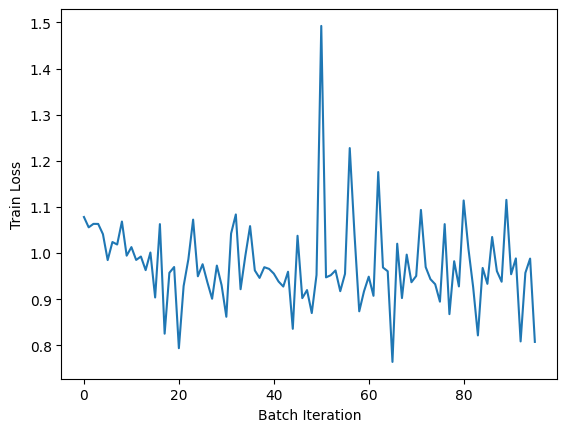

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(all_loss_resampled))], all_loss_resampled, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

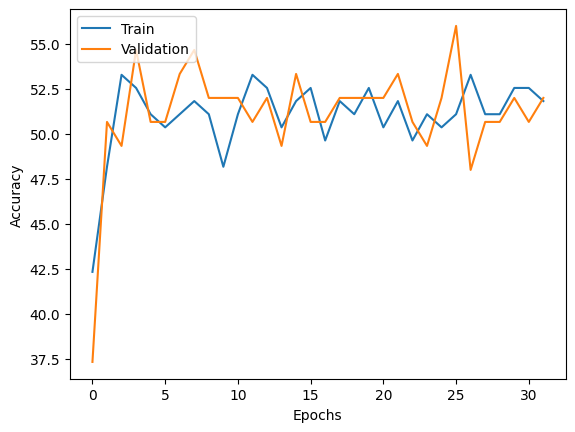

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list_resampled))], train_accuracy_list_resampled, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list_resampled))], validation_accuracy_list_resampled, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Testing data set RNN

In [ ]:


# Testing loop (using the trained model)
rnn_layer1.eval()
fc_layer1.eval()
fc_layer2.eval()

all_targets_resampled = []  # Initialize the list here
all_predictions_resampled = []  # Initialize the list here

with t.no_grad():
    for X, Y in test_data_loader_resampled:
        out, _ = rnn_layer1(X)
        out = out[:, -1, :]  # Get the last output
        out = tanh_activation(fc_layer1(out))
        out = dropout_fc(out)  # Apply dropout during testing as well
        out = fc_layer2(out)
        _, predicted = t.max(out.data, 1)

        all_targets_resampled.extend(Y.tolist())  # Update the correct list
        all_predictions_resampled.extend(predicted.tolist())  # Update the correct list

# Calculate and print metrics (for the entire test set)
test_f1_resampled = f1_score(all_targets_resampled, all_predictions_resampled, average='macro', zero_division=1)
test_precision_resampled = precision_score(all_targets_resampled, all_predictions_resampled, average='macro', zero_division=1)
test_recall_resampled = recall_score(all_targets_resampled, all_predictions_resampled, average='macro', zero_division=1)
test_acc_resampled = accuracy_score(all_targets_resampled, all_predictions_resampled)

print(f'Test F1: {test_f1_resampled:.4f}, Precision: {test_precision_resampled:.4f}, Recall: {test_recall_resampled:.4f}, Accuracy: {test_acc_resampled:.4f}')

Test F1: 0.2492, Precision: 0.6735, Recall: 0.3371, Accuracy: 0.5200
